In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import MinMaxScaler

# Grundlagen

## Begriffe
- Sample: Ein Reihe im Datensatz
- Feature: Eigenschaft
- Label: Klassifizierung

## Neuron
![neuron](img/neuron.png)

## Perceptron

![perceptron](img/perceptron.png)

## $f(x) = \sum\nolimits_{}w * x + b$

### Perceptron Learning Rule
- Prediciotn == Real Label: do nothing
- Prediction != Real Label:
    - Prediction == -1 && Real Value == 1: Increment Weights by Learning Rate
    - Prediction == 1 && Real Value == -1: Decrement Weights by Learning Rate

In [2]:
class Perceptron():

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv("iris.data", header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


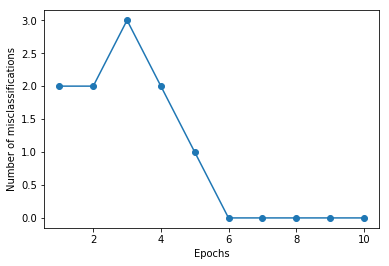

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show()

## Activation Function

In [5]:
def plot_activation(x, y, yrange=(0, 1)):
    plt.plot(x, y)
    plt.axvline(0.0, color='k')
    plt.ylim(yrange[0]-0.1, yrange[1]+0.1)
    plt.yticks(np.arange(yrange[0], yrange[1]+0.1, 0.5))
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()

### Binary Step

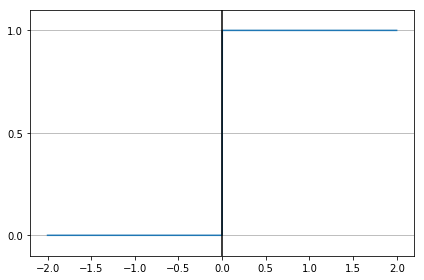

In [6]:
def threshold(x):
    return np.where(x >= 0.0, 1, 0)

x = np.arange(-2, 2, 0.001)
threshold = threshold(x)
plot_activation(x, threshold)

### Sigmoid

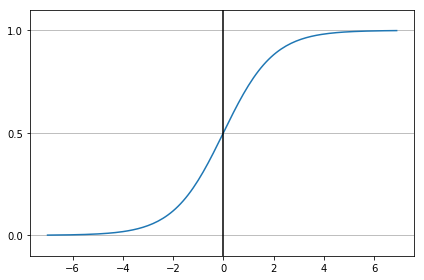

In [7]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-7, 7, 0.1)
sig = sigmoid(x)
plot_activation(x, sig)

### Tanh

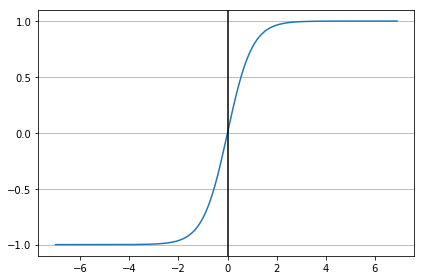

In [8]:
def tanh(x):
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

x = np.arange(-7, 7, 0.1)
tanh = tanh(x)
plot_activation(x, tanh, yrange=(-1, 1))

### Rectified linear unit

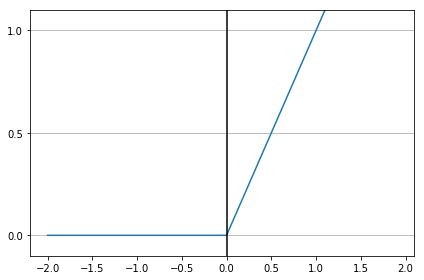

In [9]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-2, 2, 0.1)
relu = relu(x)
plot_activation(x, relu)

## Gradient Descent
![gradient-descent](img/gradient_descent.png)

#### Loss-Function:
Funktion für das Erechnen des Fehlers zwischen Label und Prediction, z.B. Mean-Squared-Error


![adaline](img/adaline.png)

In [10]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            print("-------------------------")
            print("Epoch: ", (i+1))
            print("Prediction on First Sample: ", output[0] )
            print("-------------------------")
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return sigmoid(self.net_input(X))

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

-------------------------
Epoch:  1
Prediction on First Sample:  0.5
-------------------------
-------------------------
Epoch:  2
Prediction on First Sample:  5.418153852432124e-06
-------------------------
-------------------------
Epoch:  3
Prediction on First Sample:  0.0004107165108107002
-------------------------
-------------------------
Epoch:  4
Prediction on First Sample:  0.027274569015891238
-------------------------
-------------------------
Epoch:  5
Prediction on First Sample:  2.6354619235982622e-08
-------------------------
-------------------------
Epoch:  6
Prediction on First Sample:  1.9988435518709196e-06
-------------------------
-------------------------
Epoch:  7
Prediction on First Sample:  0.0001372082153294561
-------------------------
-------------------------
Epoch:  8
Prediction on First Sample:  7.632812715578557e-10
-------------------------
-------------------------
Epoch:  9
Prediction on First Sample:  5.787913907136837e-08
-------------------------


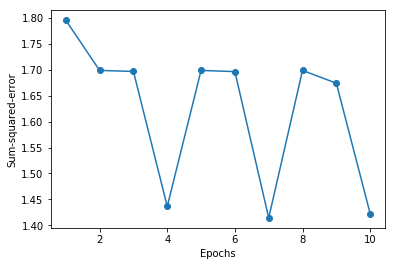

In [11]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values

n_iter = 10
eta = 0.01

ada = AdalineGD(n_iter=n_iter, eta=eta).fit(x, y)
plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()


## Stochastic Gradient Descent

![gradient-descent-3d](img/gradient_descent_3d.png)

## Backpropagation

[Backpropagation erklärrt](https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=711s)

# Deep Neural Network
![nn](img/nn2.png)

### Dense Net


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.optimizers import Adam
df = pd.read_csv("iris.data", header=None)
dataset = df.values
X = dataset[:, 0:4].astype(float)
y = dataset[:,4]


In [18]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
dummy_y = np_utils.to_categorical(encoded_y)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, dummy_y, test_size=0.2, random_state=0)

In [27]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=[X_test, Y_test])

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 1s 6ms/step - loss: 0.8771 - acc: 0.6750 - val_loss: 0.8227 - val_acc: 0.5667
Epoch 2/50
120/120 [==============================] - 0s 1ms/step - loss: 0.5742 - acc: 0.7750 - val_loss: 0.5585 - val_acc: 0.7000
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3805 - acc: 0.8667 - val_loss: 0.3768 - val_acc: 0.8000
Epoch 4/50
120/120 [==============================] - 0s 1ms/step - loss: 0.2646 - acc: 0.9167 - val_loss: 0.2844 - val_acc: 0.8667
Epoch 5/50
120/120 [==============================] - 0s 1ms/step - loss: 0.2113 - acc: 0.9250 - val_loss: 0.2113 - val_acc: 0.9667
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1717 - acc: 0.9500 - val_loss: 0.1881 - val_acc: 0.9667
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1520 - acc: 0.9417 - val_loss: 0.1366 - val_acc: 0.9667
Epoch 8/50
120/120 [===========

### CNN
![cnn](img/cnn.png)

### RNN
![rnn](img/rnn.png)

# EEG


## Preprocessing

In [ ]:
#Loading the Dataset
dataset = pd.read_csv("eeg.csv", header=None)
dataset.head()

In [ ]:
plt.plot(dataset[0][1:128])
plt.show()

In [ ]:
#Filtering
SAMPLE_RATE = 128
NYQ = 0.5 * SAMPLE_RATE

b_butter, a_butter = signal.butter(8, (8/NYQ), 'high')
b_notch, a_notch = signal.iirnotch((50/NYQ), 30.0)

for i in range(len(dataset.columns) -1 ):
     dataset[i] = signal.filtfilt(b_notch, a_notch, signal.filtfilt(b_butter, a_butter, dataset[i]))
plt.plot(dataset[0][1:128])
plt.show()

In [ ]:
#Normalize
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset.values)
scaled_dataset = pd.DataFrame(scaled_dataset)
scaled_dataset[14] = dataset[14]

In [ ]:
#Windowing
import sys
WINDOWS_SIZE = 32
STEPS = 4
window_list = []
label_list = []

for i in range(int(len(dataset)/STEPS)):
    if i*STEPS+WINDOWS_SIZE > len(dataset)-1:
        break
    window_list.append(dataset.iloc[i*STEPS:i*STEPS+WINDOWS_SIZE, 0:14].values)
    label_list.append(dataset.iloc[i*STEPS+WINDOWS_SIZE, 14])
X = np.asarray(window_list)
Y= np.asarray(label_list)
print(X.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=True)

## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(256, input_shape=(WINDOWS_SIZE, 14)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=[X_test, y_test])
y_pred = model.predict(X_test)
results = confusion_matrix(y_test, np.around(y_pred))
print("Confusion Matrix: ")
print(results)

## Conv1D

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from sklearn.metrics import confusion_matrix

model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(WINDOWS_SIZE, 14)))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Conv1D(256, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=[X_test, y_test])
y_pred = model.predict(X_test)
results = confusion_matrix(y_test, np.around(y_pred))
print("Confusion Matrix: ")
print(results)

# Deep Learning Resources
## Video Kurse:
- [The Morpheus Tutorials - Pytorch - Youtube (deutsch)](https://www.youtube.com/watch?v=pylvlMuRKY0&list=PLNmsVeXQZj7rx55Mai21reZtd_8m-qe27)
- [The Morpheus Tutorials - Machine Learning - Youtube (deutsch)](https://www.youtube.com/watch?v=GdsOLrqj42I&list=PLNmsVeXQZj7qoIUw0MBYQ9qJffZAVdRWC)
- [Deep Learning for Coders - fast.ai](http://course.fast.ai/)
- [Machine Learning Kurs der Stanford University](https://www.coursera.org/learn/machine-learning)
- [Deep Learning Kursreihe von deeplearning.ai](https://www.coursera.org/specializations/deep-learning)
- [Deep Learning A-Z - Udemy (kostenpflichtig)](https://www.udemy.com/deeplearning/learn/v4/overview)
- [Neural Networks for Machine Learning - Kurs der University of Toronto](https://www.coursera.org/learn/neural-networks)

## Blogs:
- [Machinelearningmastery](https://machinelearningmastery.com/)
- [Fastml](fastml.com)

## Bücher:
- [Fundamentals of Deep Learning](http://www.worldcat.org/title/fundamentals-of-deep-learning-designing-next-generation-machine-intelligence-algorithms/oclc/999617443)
- [Deep Learning](http://www.worldcat.org/title/deep-learning/oclc/1015864549&referer=brief_results)
- [Python Deep Learning](http://www.worldcat.org/title/python-deep-learning/oclc/1021119477?referer=di&ht=edition)
- [Deep Learning with Keras](http://www.worldcat.org/title/deep-learning-with-keras/oclc/986102549&referer=brief_results)
- [Python Machine Learning](http://www.worldcat.org/title/python-machine-learning-unlock-deeper-insights-into-machine-learning-with-this-vital-guide-to-cutting-edge-predictive-analytics/oclc/922532674&referer=brief_results)
- [Deep Learning (Bibel)](http://www.worldcat.org/title/deep-learning/oclc/985397543&referer=brief_results)
- [Sammlung kostenloser Deep Learning Bücher](https://github.com/TechBookHunter/Free-Deep-Learning-Books)

## Platformen:
- [Kaggle - Machine Learning Competitions](https://www.kaggle.com/)
- [UCI - Machine Learning Repositroy](http://archive.ics.uci.edu/ml/index.php)